# TFM v2

## Steam popularity

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar

In [2]:
df_steam = pd.read_csv('Popularity_games_Steam_Charts.csv')

In [3]:
df_steam.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%


In [4]:
df_steam.tail()

,gamename,year,month,avg,gain,peak,avg_peak_perc
83784,Steel Division: Normandy 44,2017,July,421.60,-485.13,987,42.7153%
83785,Steel Division: Normandy 44,2017,June,906.74,-231.92,2584,35.0906%
83786,Steel Division: Normandy 44,2017,May,1138.66,415.61,4606,24.7212%
83787,Steel Division: Normandy 44,2017,April,723.05,720.21,1911,37.8362%
83788,Steel Division: Normandy 44,2017,March,2.84,NaN,14,20.2857%


In [5]:
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83789 entries, 0 to 83788
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gamename       83789 non-null  object 
 1   year           83789 non-null  int64  
 2   month          83789 non-null  object 
 3   avg            83789 non-null  float64
 4   gain           82529 non-null  float64
 5   peak           83789 non-null  int64  
 6   avg_peak_perc  83789 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df_steam.shape

(83789, 7)

In [7]:
# How much games we have
df_steam['gamename'].nunique()

1260

In [8]:
# How much games we have
df_steam['month'].unique()

array(['February ', 'January ', 'December ', 'November ', 'October ',
       'September ', 'August ', 'July ', 'June ', 'May ', 'April ',
       'March '], dtype=object)

In [15]:
d = dict((v,k) for k,v in enumerate(calendar.monthrange))

TypeError: 'function' object is not iterable

In [10]:
df_steam['month_number'] = df_steam['month'].map(d)

In [11]:
df_steam.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc,month_number
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%,NaN
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%,NaN
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%,NaN
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%,NaN
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%,NaN


In [83]:
df_steam_year = df_steam.groupby(['year','month']).sum()['avg']

<AxesSubplot:xlabel='year,month'>

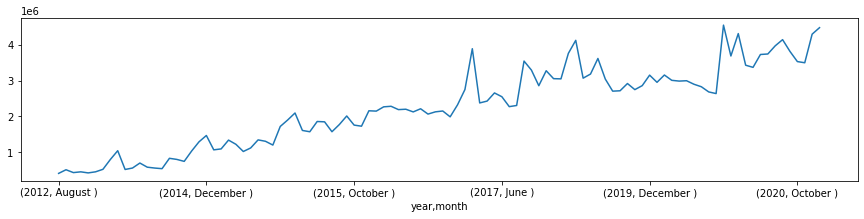

In [84]:
plt.figure(figsize=(15, 3))
df_steam_year.plot()

In [12]:
df_steam_month = df_steam.groupby(['month']).mean()['avg']
df_steam_month

month
April         2842.694788
August        2701.894005
December      2942.719318
February      2958.946605
January       3079.555741
July          2756.634665
June          2757.791533
March         2861.094525
May           2743.111273
November      2696.482128
October       2593.474025
September     2545.836073
Name: avg, dtype: float64

In [ ]:
plt.figure(figsize=(15, 3))
df_steam_month.plot()

<AxesSubplot:xlabel='year,month'>

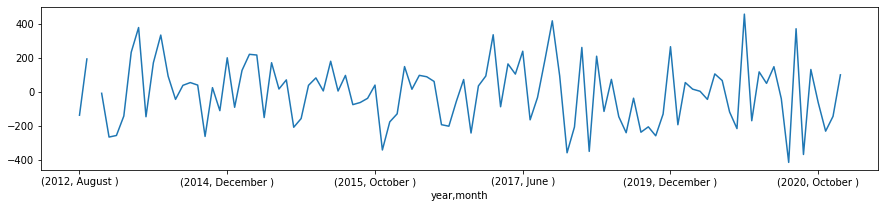

In [8]:
df_steam_year = df_steam.groupby(['year','month']).mean()['gain']
plt.figure(figsize=(15, 3))
df_steam_year.plot()

In [96]:
steam_corr = df_steam.corr()
steam_corr.style.background_gradient(cmap='coolwarm')

,year,avg,gain,peak
year,1.000000,0.008840,-0.004343,0.006567
avg,0.008840,1.000000,0.099651,0.987918
gain,-0.004343,0.099651,1.000000,0.102983
peak,0.006567,0.987918,0.102983,1.000000


In [104]:
df_steam.columns

Index(['gamename', 'year', 'month', 'avg', 'gain', 'peak', 'avg_peak_perc'], dtype='object')

In [119]:
df_steam.count()

gamename         83789
year             83789
month            83789
avg              83789
gain             82529
peak             83789
avg_peak_perc    83789
dtype: int64

## Twitch popularity

In [45]:
df_twitch = pd.read_csv('Twitch_game_data.csv')

In [120]:
df_twitch.count()

Rank                12750
Game                12749
Month               12750
Year                12750
Hours_watched       12750
Hours_Streamed      12750
Peak_viewers        12750
Peak_channels       12750
Streamers           12750
Avg_viewers         12750
Avg_channels        12750
Avg_viewer_ratio    12750
dtype: int64

In [105]:
df_twitch.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [99]:
df_twitch_year = df_twitch.groupby(['Year','Month']).sum()['Avg_channels']

<AxesSubplot:xlabel='Year,Month'>

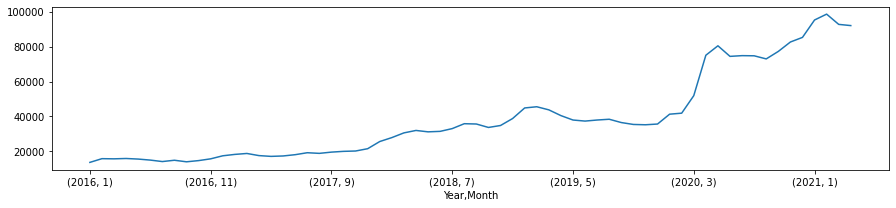

In [100]:
plt.figure(figsize=(15, 3))
df_twitch_year.plot()

In [98]:
twitch_corr = df_twitch.corr()
twitch_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Rank,Month,Year,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
Rank,1.000,-0.003,-0.002,-0.390,-0.346,-0.251,-0.354,-0.390,-0.339,0.072
Month,-0.003,1.000,-0.139,-0.011,-0.020,0.005,-0.012,-0.013,-0.013,-0.037
Year,-0.002,-0.139,1.000,0.137,0.136,0.117,0.132,0.137,0.155,-0.062
Hours_watched,-0.390,-0.011,0.137,1.000,0.734,0.547,0.758,1.000,0.767,-0.019
Peak_viewers,-0.346,-0.020,0.136,0.734,1.000,0.560,0.588,0.732,0.582,0.066
Peak_channels,-0.251,0.005,0.117,0.547,0.560,1.000,0.756,0.547,0.798,-0.028
Streamers,-0.354,-0.012,0.132,0.758,0.588,0.756,1.000,0.757,0.962,-0.043
Avg_viewers,-0.390,-0.013,0.137,1.000,0.732,0.547,0.757,1.000,0.766,-0.019
Avg_channels,-0.339,-0.013,0.155,0.767,0.582,0.798,0.962,0.766,1.000,-0.039
Avg_viewer_ratio,0.072,-0.037,-0.062,-0.019,0.066,-0.028,-0.043,-0.019,-0.039,1.000


In [121]:
df_total = pd.merge(df_steam, df_twitch, how='left', left_on=['gamename','year'], right_on=['Game', 'Year'])
df_total.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%,9.0,Counter-Strike: Global Offensive,1.0,2021.0,60899705.0,1669538 hours,592921.0,4598.0,178120.0,81964.0,2247.0,36.48
1,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%,8.0,Counter-Strike: Global Offensive,2.0,2021.0,67578481.0,1507029 hours,607485.0,4460.0,161814.0,100713.0,2245.0,44.84
2,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%,8.0,Counter-Strike: Global Offensive,3.0,2021.0,72375036.0,1626300 hours,454393.0,4379.0,170319.0,97409.0,2188.0,44.50
3,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%,8.0,Counter-Strike: Global Offensive,4.0,2021.0,70072819.0,1464933 hours,421485.0,4173.0,158206.0,97458.0,2037.0,47.83
4,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%,9.0,Counter-Strike: Global Offensive,1.0,2021.0,60899705.0,1669538 hours,592921.0,4598.0,178120.0,81964.0,2247.0,36.48


In [111]:
df_total['gamename'].count()

376560

In [112]:
df_total.isnull().sum(axis = 0)

gamename                0
year                    0
month                   0
avg                     0
gain                 5799
peak                    0
avg_peak_perc           0
Rank                59072
Game                59072
Month               59072
Year                59072
Hours_watched       59072
Hours_Streamed      59072
Peak_viewers        59072
Peak_channels       59072
Streamers           59072
Avg_viewers         59072
Avg_channels        59072
Avg_viewer_ratio    59072
dtype: int64